In [28]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

%load_ext autoreload

In [1]:
import os, shutil

In [2]:
original_dataset_dir = '/home/algolaptop8/datasets/dogs-vs-cats/'
base_dir = 'data/cats_and_dogs_small'

In [3]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [4]:
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [10]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)    

In [11]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [33]:
from tensorflow import keras

from tensorflow.keras import layers,models,utils
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

import matplotlib.pyplot as plt

In [13]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [17]:
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [22]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150),
                                                    batch_size=20, class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150, 150),
                                                        batch_size=20,class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [23]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [24]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30, validation_data=validation_generator, validation_steps=50)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
100/100 [==============================] - 19s 192ms/step - loss: 0.6889 - acc: 0.5425 - val_loss: 0.6732 - val_acc: 0.5490
Epoch 2/30
100/100 [==============================] - 11s 115ms/step - loss: 0.6577 - acc: 0.6050 - val_loss: 0.6397 - val_acc: 0.6270
Epoch 3/30
100/100 [==============================] - 11s 106ms/step - loss: 0.6157 - acc: 0.6695 - val_loss: 0.6009 - val_acc: 0.6730
Epoch 4/30
100/100 [==============================] - 11s 113ms/step - loss: 0.5667 - acc: 0.7075 - val_loss: 0.6107 - val_acc: 0.6590
Epoch 5/30
100/100 [==============================] - 12s 115ms/step - loss: 0.5381 - acc: 0.7310 - val_loss: 0.6020 - val_acc: 0.6740
Epoch 6/30
100/100 [==============================] - 10s 104ms/step - loss: 0.5142 - acc: 0.7320 - val_loss: 0.6147 - val_acc: 0.6530
Epoch 7/30
100/100 [==============================] - 11s 110ms/step - loss: 0.4934 - acc: 0.7595 - val_loss: 0.5583 - val_acc: 0.7080
Epoch 8

In [25]:
model.save('model/cats_and_dogs_small_1.h5')

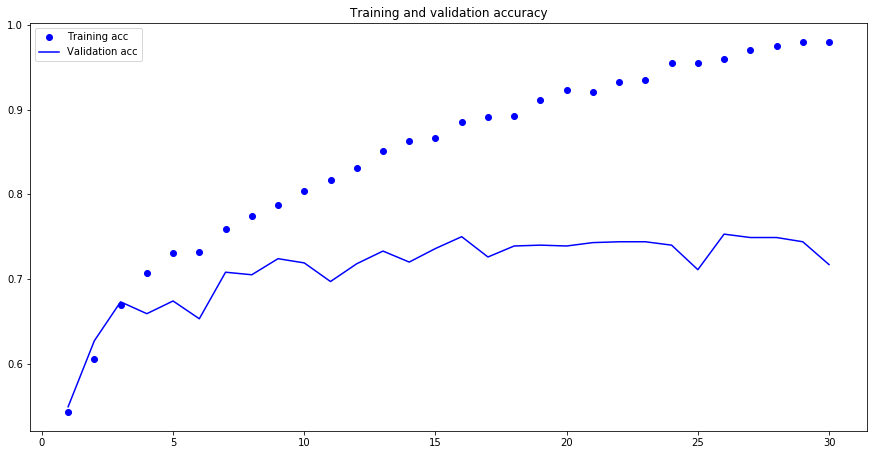

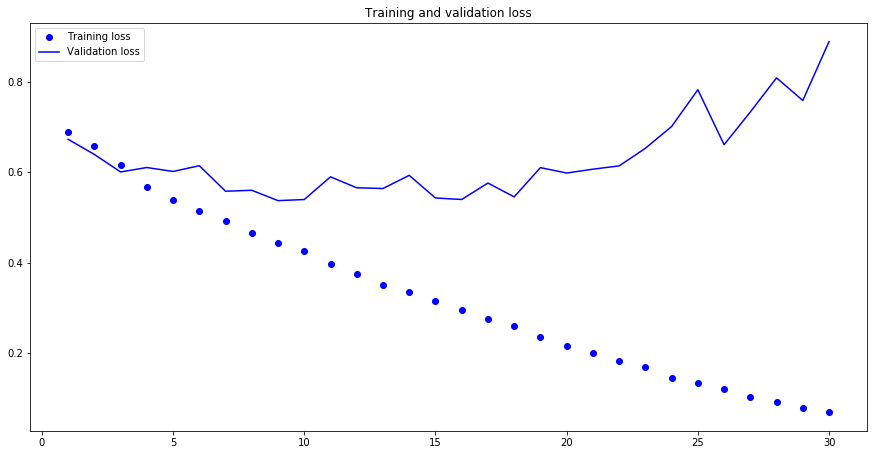

In [31]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(15,7.5))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure(figsize=(15,7.5))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### data augmentation

In [32]:
datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                             zoom_range=0.2,  horizontal_flip=True, fill_mode='nearest')

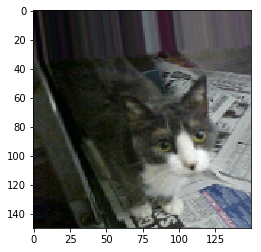

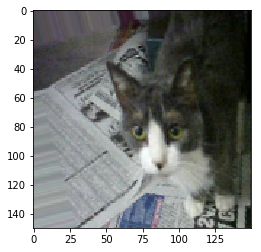

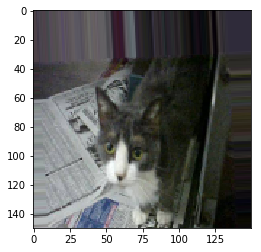

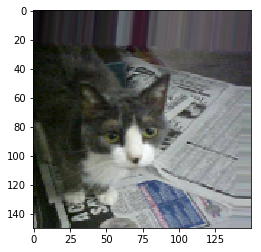

In [49]:
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[18]
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
    plt.show()

In [50]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [51]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   zoom_range=0.2, horizontal_flip=True,)

In [52]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [53]:
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150, 150),batch_size=32,class_mode='binary')

Found 2000 images belonging to 2 classes.


In [54]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=100, validation_data=validation_generator, validation_steps=50)

Epoch 1/100
63/63 [==============================] - 18s 283ms/step - loss: 0.6911 - acc: 0.5330 - val_loss: 0.6850 - val_acc: 0.5660
Epoch 2/100
63/63 [==============================] - 15s 243ms/step - loss: 0.6894 - acc: 0.5445 - val_loss: 0.6785 - val_acc: 0.5340
Epoch 3/100
63/63 [==============================] - 15s 231ms/step - loss: 0.6804 - acc: 0.5550 - val_loss: 0.6887 - val_acc: 0.5280
Epoch 4/100
63/63 [==============================] - 16s 261ms/step - loss: 0.6712 - acc: 0.5665 - val_loss: 0.7052 - val_acc: 0.5300
Epoch 5/100
63/63 [==============================] - 16s 258ms/step - loss: 0.6666 - acc: 0.5985 - val_loss: 0.6719 - val_acc: 0.5770
Epoch 6/100
63/63 [==============================] - 18s 284ms/step - loss: 0.6599 - acc: 0.5940 - val_loss: 0.6390 - val_acc: 0.6160
Epoch 7/100
63/63 [==============================] - 13s 207ms/step - loss: 0.6497 - acc: 0.6155 - val_loss: 0.6567 - val_acc: 0.6020
Epoch 8/100
63/63 [==============================] - 16s 258ms

Epoch 39/100
63/63 [==============================] - 16s 258ms/step - loss: 0.5125 - acc: 0.7450 - val_loss: 0.5123 - val_acc: 0.7400
Epoch 40/100
63/63 [==============================] - 19s 295ms/step - loss: 0.5147 - acc: 0.7390 - val_loss: 0.5276 - val_acc: 0.7330
Epoch 41/100
63/63 [==============================] - 16s 256ms/step - loss: 0.5195 - acc: 0.7395 - val_loss: 0.5141 - val_acc: 0.7370
Epoch 42/100
63/63 [==============================] - 15s 232ms/step - loss: 0.5109 - acc: 0.7440 - val_loss: 0.5352 - val_acc: 0.7210
Epoch 43/100
63/63 [==============================] - 16s 255ms/step - loss: 0.5084 - acc: 0.7450 - val_loss: 0.6443 - val_acc: 0.7020
Epoch 44/100
63/63 [==============================] - 19s 308ms/step - loss: 0.4998 - acc: 0.7550 - val_loss: 0.4994 - val_acc: 0.7600
Epoch 45/100
63/63 [==============================] - 17s 270ms/step - loss: 0.5017 - acc: 0.7575 - val_loss: 0.4926 - val_acc: 0.7570
Epoch 46/100
63/63 [==============================] - 1

Epoch 77/100
63/63 [==============================] - 11s 172ms/step - loss: 0.4425 - acc: 0.7915 - val_loss: 0.5750 - val_acc: 0.7270
Epoch 78/100
63/63 [==============================] - 11s 176ms/step - loss: 0.4471 - acc: 0.7775 - val_loss: 0.4832 - val_acc: 0.7570
Epoch 79/100
63/63 [==============================] - 10s 164ms/step - loss: 0.4240 - acc: 0.8005 - val_loss: 0.4972 - val_acc: 0.7700
Epoch 80/100
63/63 [==============================] - 10s 164ms/step - loss: 0.4361 - acc: 0.7995 - val_loss: 0.4371 - val_acc: 0.8000
Epoch 81/100
63/63 [==============================] - 10s 162ms/step - loss: 0.4213 - acc: 0.8080 - val_loss: 0.4698 - val_acc: 0.7910
Epoch 82/100
63/63 [==============================] - 10s 162ms/step - loss: 0.4215 - acc: 0.8075 - val_loss: 0.5158 - val_acc: 0.7650
Epoch 83/100
63/63 [==============================] - 10s 166ms/step - loss: 0.4226 - acc: 0.8035 - val_loss: 0.5163 - val_acc: 0.7540
Epoch 84/100
63/63 [==============================] - 1

In [55]:
model.save('model/cats_and_dogs_small_2.h5')

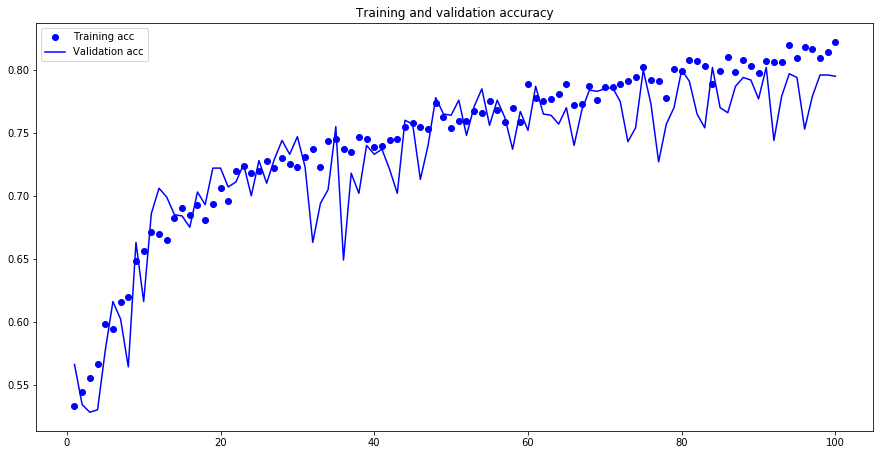

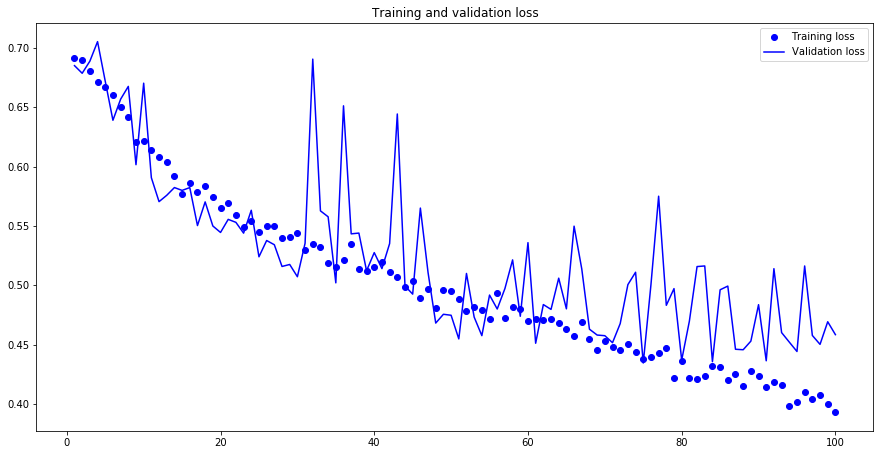

In [56]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(15,7.5))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure(figsize=(15,7.5))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()